## Introduction to soccer dataset

In this week, we have been evaluating external sensors and their use for characterizing training and/or competition efforts.  In this dataset, we have daily sessions from a team across an entire season.   We will explore the use of the acute to chronic workload ratio as a strategy to try and limit injury through avoiding unaccustomed high load training.  In addition, "return to play" schedules can also be guided by strategies like the acute to chronic workload in order to not do "too much too soon".  

The players names have been removed to de-identify the players.  However the remainder of the dataset is a typical Catapult Sports dataset.  As soccer is an outdoor sport, the original dataset would have both heart rate, the Catapult "Playerload" as well as GPS coordinates.  In order to simplify this dataset, we will focus on the playerload score and the calculation of the acute-to-chronic workload ratio.  

The player positions are abbreviated in the dataset: Defensive players (D); Forwards (F); Mid-fielders (M); and the goal-keeper (GK).

## 1. Import Libraries and Data

In [1]:
# imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime
#turns off warning for chained assignment since I am overwriting reference to original dataframe
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_rows', 30)

In [2]:
df = pd.read_csv("D:\\GitHub\\Coursera\\SportsPerformanceAnalytics\\WearableTechnologiesAndSportsAnalytics\\data\\Soccer.csv", parse_dates=["Date"])
df.head()

,Player.Name,Period.Name,Position.Name,Total.Player.Load,Player.Load.Per.Minute,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Date
0,12,Session,D,276.85373,15.33448,205,0,170.91685,2019-08-06
1,89,Session,GK,238.00543,14.04880,205,101,174.15563,2019-08-06
2,63,Session,F,231.84551,14.36184,206,0,179.25900,2019-08-06
3,15,Session,D,355.02606,18.78379,216,0,177.66543,2019-08-06
4,44,Session,D,318.82076,17.41175,218,0,180.77740,2019-08-06


Let's explore a little more about this dataset.  Let's check out the size and column names.

In [3]:
df.shape

(9554, 9)

In [4]:
print(df.columns)

Index(['Player.Name', 'Period.Name', 'Position.Name', 'Total.Player.Load',
       'Player.Load.Per.Minute', 'Maximum.Heart.Rate', 'Minimum.Heart.Rate',
       'Avg.Heart.Rate', 'Date'],
      dtype='object')


The dataset includes periods of data titled according to each individual "part" of practice (i.e., Team warmup, Group 1, Group 2, etc.), as well as cumulative data for the entire practice, titled "Session". We are only interested in the total player load for the session, so we will filter out the rows where the period is titled "Session" and put this into a new dataframe called 'session_df'

In [5]:
session_df = df.loc[df['Period.Name'] == "Session"]

session_df

,Player.Name,Period.Name,Position.Name,Total.Player.Load,Player.Load.Per.Minute,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Date
0,12,Session,D,276.85373,15.33448,205,0,170.91685,2019-08-06
1,89,Session,GK,238.00543,14.04880,205,101,174.15563,2019-08-06
2,63,Session,F,231.84551,14.36184,206,0,179.25900,2019-08-06
3,15,Session,D,355.02606,18.78379,216,0,177.66543,2019-08-06
4,44,Session,D,318.82076,17.41175,218,0,180.77740,2019-08-06
...,...,...,...,...,...,...,...,...,...
9499,23,Session,GK,185.24280,4.66020,0,0,0.00000,2019-11-24
9500,21,Session,D,1364.75000,9.87637,129,0,129.00000,2019-11-24
9501,43,Session,M,1294.72809,11.25361,225,0,166.42591,2019-11-24
9502,91,Session,F,633.34450,6.94490,128,0,128.00000,2019-11-24


Note: Early in the season the team had some training days where they performed more than one practice.  As a result, we have several days in the season where there is more than one "session" captured in a day. 

We can calculate the duration of the training session by dividing the total player load of the session by the player load per minute of the session.  So, we will calculate the session duration before we begin performing broader calculations and analyses with the dataset.

In [6]:
session_df['Session.Duration'] = session_df['Total.Player.Load']/session_df['Player.Load.Per.Minute']
session_df

,Player.Name,Period.Name,Position.Name,Total.Player.Load,Player.Load.Per.Minute,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Date,Session.Duration
0,12,Session,D,276.85373,15.33448,205,0,170.91685,2019-08-06,18.054328
1,89,Session,GK,238.00543,14.04880,205,101,174.15563,2019-08-06,16.941335
2,63,Session,F,231.84551,14.36184,206,0,179.25900,2019-08-06,16.143162
3,15,Session,D,355.02606,18.78379,216,0,177.66543,2019-08-06,18.900662
4,44,Session,D,318.82076,17.41175,218,0,180.77740,2019-08-06,18.310667
...,...,...,...,...,...,...,...,...,...,...
9499,23,Session,GK,185.24280,4.66020,0,0,0.00000,2019-11-24,39.749968
9500,21,Session,D,1364.75000,9.87637,129,0,129.00000,2019-11-24,138.183361
9501,43,Session,M,1294.72809,11.25361,225,0,166.42591,2019-11-24,115.050023
9502,91,Session,F,633.34450,6.94490,128,0,128.00000,2019-11-24,91.195626


In [7]:
print(session_df.columns)

Index(['Player.Name', 'Period.Name', 'Position.Name', 'Total.Player.Load',
       'Player.Load.Per.Minute', 'Maximum.Heart.Rate', 'Minimum.Heart.Rate',
       'Avg.Heart.Rate', 'Date', 'Session.Duration'],
      dtype='object')


We will talk more about internal measures like heart rate in the future.  However, to keep things simple for now, we'll focus on just the "playerload" and the session duration captured in the Catapult Sports activities.



In [8]:
columns_to_keep = ['Date', 'Player.Name', 'Period.Name', 'Position.Name', 'Total.Player.Load','Session.Duration']

session_df = session_df[columns_to_keep]
session_df

,Date,Player.Name,Period.Name,Position.Name,Total.Player.Load,Session.Duration
0,2019-08-06,12,Session,D,276.85373,18.054328
1,2019-08-06,89,Session,GK,238.00543,16.941335
2,2019-08-06,63,Session,F,231.84551,16.143162
3,2019-08-06,15,Session,D,355.02606,18.900662
4,2019-08-06,44,Session,D,318.82076,18.310667
...,...,...,...,...,...,...
9499,2019-11-24,23,Session,GK,185.24280,39.749968
9500,2019-11-24,21,Session,D,1364.75000,138.183361
9501,2019-11-24,43,Session,M,1294.72809,115.050023
9502,2019-11-24,91,Session,F,633.34450,91.195626


Let's check the dataset to see if there are players with a very limited use of the Catapult device - that might skew the dataset. 

We can use the groupby function to provide a sorting of the entire roster - according to the total duration of collected data across the season.  

In [9]:
Rank_Total_PL = session_df.groupby(['Player.Name', 'Position.Name'])[['Period.Name']].count()
print("Total number of sessions captured during entire season")


print(Rank_Total_PL.sort_values(by='Period.Name', ascending = False))

Total number of sessions captured during entire season
                           Period.Name
Player.Name Position.Name             
12          D                       89
66          M                       89
21          D                       89
97          F                       88
62          F                       88
39          D                       88
43          M                       88
23          GK                      87
35          F                       87
89          GK                      85
4           M                       84
52          D                       84
100         D                       84
34          M                       83
15          D                       83
86          M                       82
44          D                       80
63          F                       80
91          F                       78
71          GK                      77
49          F                       77
48          M                       73
10       

It appears that there are two players that have a VERY limited number of sessions recorded regarding Catapult data.  Although there are many possible reasons for this -- we might simplify our dataset by eliminating those players from the dataframe by using the 'drop' function.  First, let's see how many minutes these same athletes had recorded during Catapult sessions.

In [10]:
Rank_Total_PL = session_df.groupby(['Player.Name', 'Position.Name'])[['Session.Duration']].sum()
print("Total duration captured for entire season")


print(Rank_Total_PL.sort_values(by='Session.Duration', ascending = False))

Total duration captured for entire season
                           Session.Duration
Player.Name Position.Name                  
89          GK                  7256.995713
62          F                   6949.439679
21          D                   6931.008604
4           M                   6922.743520
43          M                   6896.000699
66          M                   6702.279641
39          D                   6533.952654
100         D                   6507.394600
44          D                   6375.365217
12          D                   6072.777551
52          D                   5765.626189
63          F                   5626.914479
35          F                   5616.998042
97          F                   5398.132561
86          M                   5379.001886
10          D                   5149.013432
91          F                   5052.888632
15          D                   5035.069630
23          GK                  4989.634635
49          F                   48

We can see clearly that "Player 62" and "Player 98" have very limited collections during this season.  In addition, we see that "Player 95" is listed as a defender (D) for 63 sessions and as a forward (F) for another 14 sessions.  Since this adds up to a typical number of sessions -- we will leave "Player 95" in the team dataset.

In order to 'drop' these two players from the dataset moving forward, we want to make the "player name" our index.  So, we will use the set_index method as follows: 


In [11]:
session_df=session_df.set_index('Player.Name')
session_df

,Date,Period.Name,Position.Name,Total.Player.Load,Session.Duration
Player.Name,,,,,
12,2019-08-06,Session,D,276.85373,18.054328
89,2019-08-06,Session,GK,238.00543,16.941335
63,2019-08-06,Session,F,231.84551,16.143162
15,2019-08-06,Session,D,355.02606,18.900662
44,2019-08-06,Session,D,318.82076,18.310667
...,...,...,...,...,...
23,2019-11-24,Session,GK,185.24280,39.749968
21,2019-11-24,Session,D,1364.75000,138.183361
43,2019-11-24,Session,M,1294.72809,115.050023


Now that we have made the player name (which is identified by a number) -- we can simply use the 'drop' method to delete these two players from our dataset.

In [12]:
session_df=session_df.drop([98, 62])
session_df

,Date,Period.Name,Position.Name,Total.Player.Load,Session.Duration
Player.Name,,,,,
12,2019-08-06,Session,D,276.85373,18.054328
89,2019-08-06,Session,GK,238.00543,16.941335
63,2019-08-06,Session,F,231.84551,16.143162
15,2019-08-06,Session,D,355.02606,18.900662
44,2019-08-06,Session,D,318.82076,18.310667
...,...,...,...,...,...
23,2019-11-24,Session,GK,185.24280,39.749968
21,2019-11-24,Session,D,1364.75000,138.183361
43,2019-11-24,Session,M,1294.72809,115.050023


We can see that we have deleted about 100 rows from our dataframe and we have 2033 left.  We are nearly ready to start analyzing our data for trends regarding the teams training and recovery.

Next, let's take a look at the columns, shape and datatypes of our current dataframe to make sure we are ready.

In [13]:
print(session_df.columns)
print(session_df.shape)
print(session_df.head())
print(session_df.dtypes)

Index(['Date', 'Period.Name', 'Position.Name', 'Total.Player.Load',
       'Session.Duration'],
      dtype='object')
(2033, 5)
                  Date Period.Name Position.Name  Total.Player.Load  \
Player.Name                                                           
12          2019-08-06     Session             D          276.85373   
89          2019-08-06     Session            GK          238.00543   
63          2019-08-06     Session             F          231.84551   
15          2019-08-06     Session             D          355.02606   
44          2019-08-06     Session             D          318.82076   

             Session.Duration  
Player.Name                    
12                  18.054328  
89                  16.941335  
63                  16.143162  
15                  18.900662  
44                  18.310667  
Date                 datetime64[ns]
Period.Name                  object
Position.Name                object
Total.Player.Load           float64
Sessio

The last things we want to do is to move our "player name" out of the index and set the "date" column as the next index.  

In [14]:
session_df=session_df.set_index('Date', append=True)
session_df.head()

,,Period.Name,Position.Name,Total.Player.Load,Session.Duration
Player.Name,Date,,,,
12,2019-08-06,Session,D,276.85373,18.054328
89,2019-08-06,Session,GK,238.00543,16.941335
63,2019-08-06,Session,F,231.84551,16.143162
15,2019-08-06,Session,D,355.02606,18.900662
44,2019-08-06,Session,D,318.82076,18.310667


Finally, we can remove the "player name" column from the index and then make sure it set as an object rather than an integer so that we are not performing calculations on the "player name".

In [15]:
session_df.reset_index(level=['Player.Name'], inplace=True)
session_df

,Player.Name,Period.Name,Position.Name,Total.Player.Load,Session.Duration
Date,,,,,
2019-08-06,12,Session,D,276.85373,18.054328
2019-08-06,89,Session,GK,238.00543,16.941335
2019-08-06,63,Session,F,231.84551,16.143162
2019-08-06,15,Session,D,355.02606,18.900662
2019-08-06,44,Session,D,318.82076,18.310667
...,...,...,...,...,...
2019-11-24,23,Session,GK,185.24280,39.749968
2019-11-24,21,Session,D,1364.75000,138.183361
2019-11-24,43,Session,M,1294.72809,115.050023


Note: the player name column has been auto-identified as "int64" integer type. When we de-identified this dataset -- we changed the players names to numbers. However, performing calculations on the player identifier doesn't make sense. Therefore, we'll change the player name column to an "object" -- to keep it as a player identifier rather than a number to be calculated.

In [16]:
session_df['Player.Name'] = session_df['Player.Name'].astype('object')
session_df 

,Player.Name,Period.Name,Position.Name,Total.Player.Load,Session.Duration
Date,,,,,
2019-08-06,12,Session,D,276.85373,18.054328
2019-08-06,89,Session,GK,238.00543,16.941335
2019-08-06,63,Session,F,231.84551,16.143162
2019-08-06,15,Session,D,355.02606,18.900662
2019-08-06,44,Session,D,318.82076,18.310667
...,...,...,...,...,...
2019-11-24,23,Session,GK,185.24280,39.749968
2019-11-24,21,Session,D,1364.75000,138.183361
2019-11-24,43,Session,M,1294.72809,115.050023


## 2. Data Manipulation

#### 2.1 Setting up the data
Let's look at one player first. In order to accurately calculate the 7-day and 28-day moving averages, we must "fill in" the missing days where data was not collected using the resample function from pandas. We will then use the fillna function to fill in those days with the value 0. This is done to ensure that each day in the 7-day or 28-day window is weighted the same when calculating averages.

In [17]:
df_12 = session_df.loc[session_df['Player.Name'] == 12] 
df_12 = df_12.resample('D').sum()
df_12 = df_12.fillna(0)
df_12

,Total.Player.Load,Session.Duration
Date,,
2019-08-06,1290.83653,147.753533
2019-08-07,1328.71860,212.571606
2019-08-08,0.00000,0.000000
2019-08-09,1224.42053,175.575107
2019-08-10,391.29193,79.173473
...,...,...
2019-11-20,277.82471,48.422692
2019-11-21,306.31356,47.066656
2019-11-22,1370.46912,134.992861


#### 2.2 Calculating moving averages and acute to chronic ratio
We will create 2 new columns to store the 7-day and 28-day moving averages, titled "Acute_PL" and "Chronic_PL", respectively. We will also create a new column titled "Acute:Chronic" that stores the acute to chronic player load ratio.

In [18]:
df_12["Acute_PL"] = (df_12.loc[:,"Total.Player.Load"].rolling('7D', 7).sum())/7
df_12["Chronic_PL"] = (df_12.loc[:,"Total.Player.Load"].rolling('28D', 28).sum())/28
df_12["Acute:Chronic"] = df_12.loc[:,"Acute_PL"]/df_12.loc[:,"Chronic_PL"]
df_12

,Total.Player.Load,Session.Duration,Acute_PL,Chronic_PL,Acute:Chronic
Date,,,,,
2019-08-06,1290.83653,147.753533,NaN,NaN,NaN
2019-08-07,1328.71860,212.571606,NaN,NaN,NaN
2019-08-08,0.00000,0.000000,NaN,NaN,NaN
2019-08-09,1224.42053,175.575107,NaN,NaN,NaN
2019-08-10,391.29193,79.173473,NaN,NaN,NaN
...,...,...,...,...,...
2019-11-20,277.82471,48.422692,376.017229,270.497919,1.390093
2019-11-21,306.31356,47.066656,385.597211,270.831470,1.423753
2019-11-22,1370.46912,134.992861,392.976070,305.296359,1.287195


Note: By using the "minimum observations" parameter in the rolling function we are able to make sure that we are not generating a number before we have an adequate number of observations.  

For example, in this line of code from above: 

df_12["Acute_PL"] = (df_12.loc[:,"Total.Player.Load"].rolling('7D', 7).sum())/7

The rolling function allows us to provide the size of the "window" that we want to capture the rolling value for (in this case we have '7D' to represent our 7 day window).  However, we have also included the '7' in the next parameter which is the minimum period.  This way -- we are not attempting to generate a value for the acute player load variable before we have 7 days of observations.  

## 3. Data Visualization

#### 3.1 Creating graphs
We will create two subplots in order to see the acute to chronic ratio as well as the daily total player loads for Player 12.

The top graph is a bar graph showing the average player load for each day. The bottom graph consists of;

1. Acute player load (light pink bars)
2. Chronic player load (shaded orange)
3. Acute to chronic workload ratio (dark purple line)
4. "Normal" threshold (gray line)

The acute to chronic workload ratio (and the chronic workload value) do not start until 28 days (this is due to the calculation of the rolling averages requiring a minimum of 28 observations).  This makes for a cleaner visualization as well.

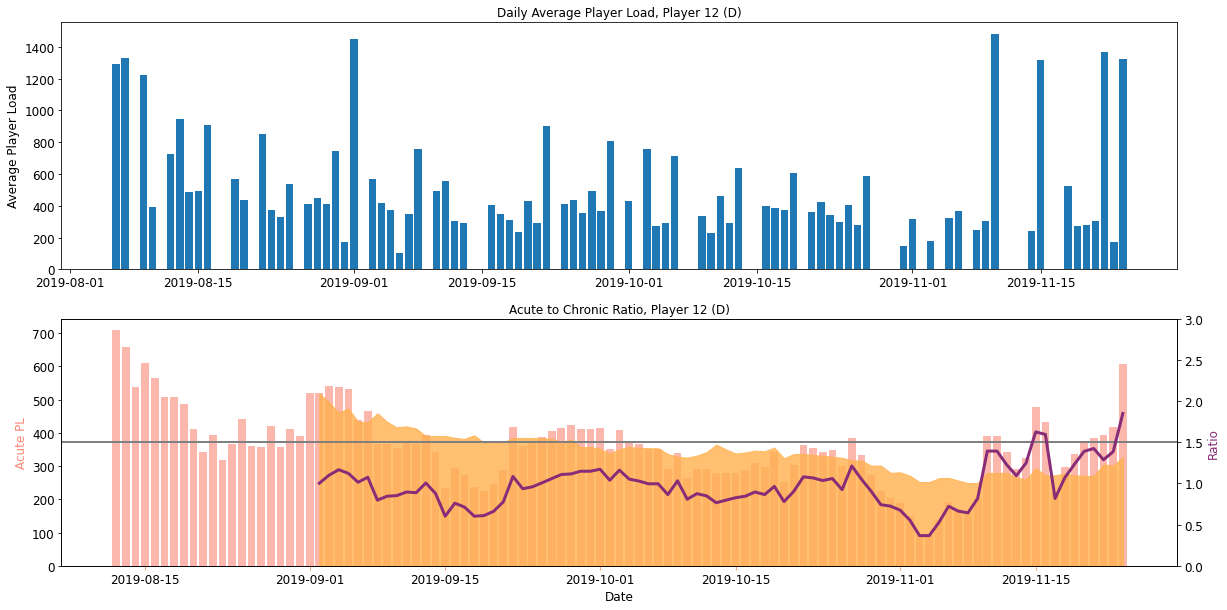

In [19]:
fig, axs = plt.subplots(2,figsize=(20, 10))

axs[0].bar(df_12.index, df_12["Total.Player.Load"])
#axs[0].set_xlabel("Date", fontsize=12)
axs[0].tick_params(axis='x', labelsize=12,)
axs[0].set_ylabel('Average Player Load', fontsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].set_title("Daily Average Player Load, Player 12 (D)", fontsize=12)

color='#FA8775'
axs[1].set_xlabel("Date", fontsize=12)
axs[1].tick_params(axis='x', labelsize=12, color=color)
axs[1].set_ylabel('Acute PL', color=color, fontsize=12)
axs[1].bar(df_12.index, df_12["Acute_PL"], color=color, alpha=0.6)
axs[1].tick_params(axis='y', labelsize=12)
color='#FFB14E'
axs[1].fill_between(df_12.index, df_12["Chronic_PL"], color=color, alpha=0.8)
axs[1] = plt.gca()
axs[1].set_title("Acute to Chronic Ratio, Player 12 (D)", fontsize=12)
axs1 = axs[1].twinx()  # instantiate a second axes that shares the same x-axis

color='#882C78'
axs1.set_ylabel('Ratio', fontsize=12, color=color)  # we already handled the x-label with ax1
axs1.plot(df_12.index, df_12["Acute:Chronic"], color=color, linewidth=3.0)
axs1.tick_params(axis='y', labelsize=12)
axs1 = plt.gca()

# To see how the acute to chronic workload ratio drops over the first 28 days, 
# comment out this line by adding a '#' in front of the line
axs1.set_ylim([0,3.0])

axs1.axhline(y=1.5,c="gray",linewidth=2,zorder=0)

This figure provides us a nice visual of the daily playerload of player 12 -- which was highest during the first days of the season where the team was performing two separate sessions of training and again at the end of the season on game days -- when player 12 was likely playing the majority of the game (based on these playerloads).

If we look at the acute to chronic workload ratio (ACWR) -- we see that this player had a very high acute player load early on (the light pink bars) -- which then resulted in the ACWR being well below the 1.5 threshold until the very end of the season, when the competition period tournaments were played.

Let's take a look at another player on the team -- to compare.  In this case we'll look at a player that had several missed practices and/or games.

In [20]:
df_63 = session_df.loc[session_df['Player.Name'] == 63] 
df_63 = df_63.resample('D').sum()
df_63 = df_63.fillna(0)

df_63["Acute_PL"] = (df_63.loc[:,"Total.Player.Load"].rolling('7D', 7).sum())/7
df_63["Chronic_PL"] = (df_63.loc[:,"Total.Player.Load"].rolling('28D', 28).sum())/28
df_63["Acute:Chronic"] = df_63.loc[:,"Acute_PL"]/df_63.loc[:,"Chronic_PL"]

df_63.head()

,Total.Player.Load,Session.Duration,Acute_PL,Chronic_PL,Acute:Chronic
Date,,,,,
2019-08-06,973.93330,145.842298,NaN,NaN,NaN
2019-08-07,1081.71264,212.306644,NaN,NaN,NaN
2019-08-08,0.00000,0.000000,NaN,NaN,NaN
2019-08-09,838.09220,175.575281,NaN,NaN,NaN
2019-08-10,411.94819,86.198401,NaN,NaN,NaN


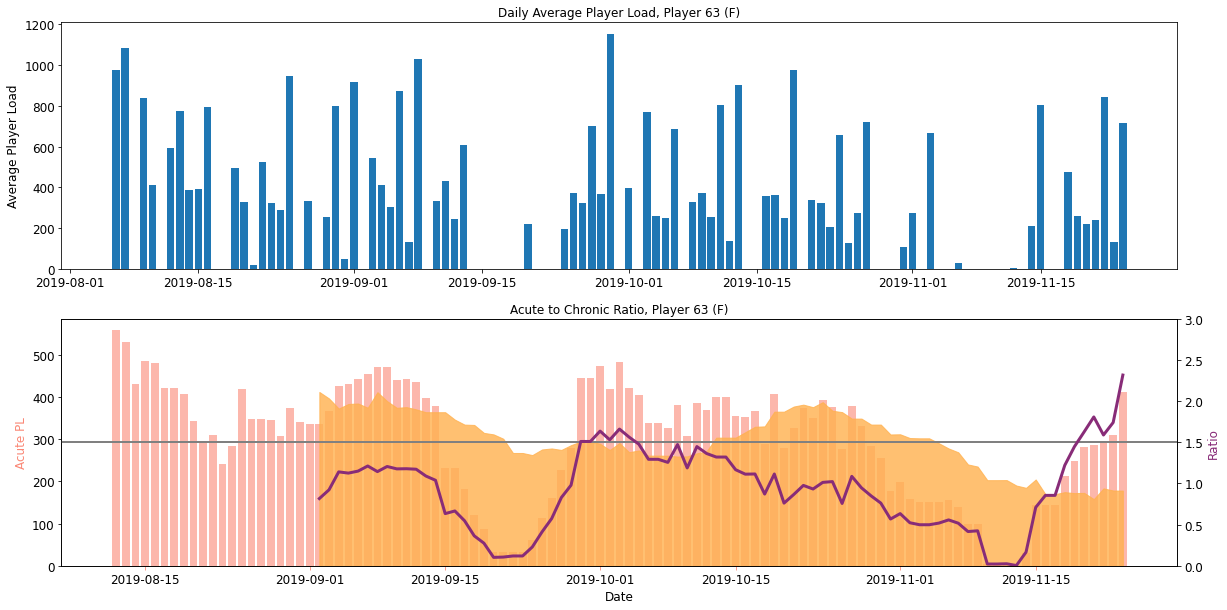

In [21]:
fig, axs = plt.subplots(2,figsize=(20, 10))

axs[0].bar(df_63.index, df_63["Total.Player.Load"])
#axs[0].set_xlabel("Date", fontsize=12)
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_ylabel('Average Player Load', fontsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].set_title("Daily Average Player Load, Player 63 (F)", fontsize=12)

color='#FA8775'
axs[1].set_xlabel("Date", fontsize=12)
axs[1].tick_params(axis='x', labelsize=12, color=color)

axs[1].set_ylabel('Acute PL', color=color, fontsize=12)
axs[1].bar(df_63.index, df_63['Acute_PL'], color=color, alpha=0.6)
axs[1].tick_params(axis='y', labelsize=12)

color='#FFB14E'
axs[1].fill_between(df_63.index, df_63["Chronic_PL"], color=color, alpha=0.8)
axs[1] = plt.gca()
axs[1].set_title("Acute to Chronic Ratio, Player 63 (F)", fontsize=12)
axs1 = axs[1].twinx()  # instantiate a second axes that shares the same x-axis

color='#882C78'
axs1.set_ylabel('Ratio', fontsize=12, color=color)  # we already handled the x-label with ax1
axs1.plot(df_63.index, df_63["Acute:Chronic"], color=color, linewidth=3.0)
axs1.tick_params(axis='y', labelsize=12)
axs1 = plt.gca()

# To see how the acute to chronic workload ratio drops over the first 28 days, 
# comment out this line by adding a '#' in front of the line
axs1.set_ylim([0,3.0])

axs1.axhline(y=1.5,c="gray",linewidth=2,zorder=0)

We can see that this player had a period of time off in mid to late-September and again in early November.  You can also see that this leads to high ACWR values in the return to play.  Wearable devices can provide a useful method for quantifying the return to play effort to make sure that athletes do not return too fast to high-level play following time off.  

Note: We only have access to the Catapult dataset here - and this player may have been performing some alternative form of exercise (e.g. bicycle ergometer) during the down periods that we see here -- which would be useful for maintaining fitness - but not captured in our dataset!  

Finally -- let's look at one more athlete from the team.  A goalkeeper.  Player 89.  We learned earlier that they had more session duration than any other player.  So, let's see if how there ACWR stacks up.

In [22]:
df_89 = session_df.loc[session_df['Player.Name'] == 89] 
df_89 = df_89.resample('D').sum()
df_89 = df_89.fillna(0)

df_89["Acute_PL"] = (df_89.loc[:,"Total.Player.Load"].rolling('7D', 7).sum())/7
df_89["Chronic_PL"] = (df_89.loc[:,"Total.Player.Load"].rolling('28D', 28).sum())/28
df_89["Acute:Chronic"] = df_89.loc[:,"Acute_PL"]/df_89.loc[:,"Chronic_PL"]
df_89.head()

,Total.Player.Load,Session.Duration,Acute_PL,Chronic_PL,Acute:Chronic
Date,,,,,
2019-08-06,724.11928,142.614968,NaN,NaN,NaN
2019-08-07,672.26484,189.790474,NaN,NaN,NaN
2019-08-08,0.00000,0.000000,NaN,NaN,NaN
2019-08-09,569.11939,181.132939,NaN,NaN,NaN
2019-08-10,2.70288,27.200161,NaN,NaN,NaN


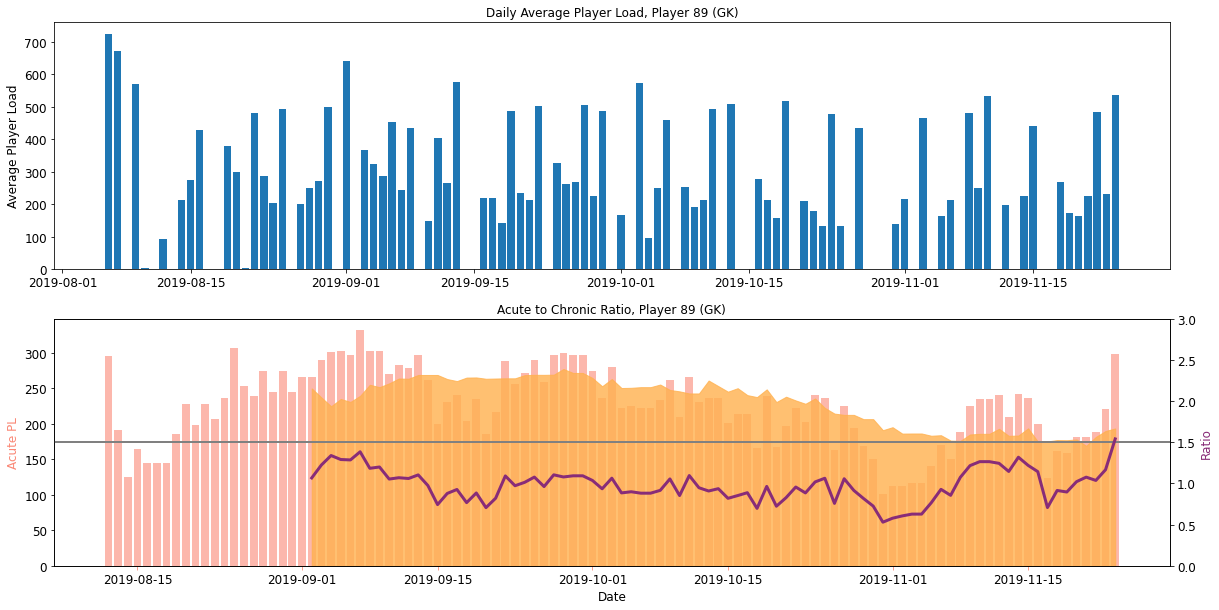

In [23]:
fig, axs = plt.subplots(2,figsize=(20, 10))

axs[0].bar(df_89.index, df_89["Total.Player.Load"])
#axs[0].set_xlabel("Date", fontsize=12)
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_ylabel('Average Player Load', fontsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].set_title("Daily Average Player Load, Player 89 (GK)", fontsize=12)

color='#FA8775'
axs[1].set_xlabel("Date", fontsize=12)
axs[1].tick_params(axis='x', labelsize=12, color=color)
axs[1].set_ylabel('Acute PL', color=color, fontsize=12)
axs[1].bar(df_89.index, df_89["Acute_PL"], color=color, alpha=0.6)
axs[1].tick_params(axis='y', labelsize=12)

color='#FFB14E'
axs[1].fill_between(df_89.index, df_89["Chronic_PL"], color=color, alpha=0.8)
axs[1] = plt.gca()
axs[1].set_title("Acute to Chronic Ratio, Player 89 (GK)", fontsize=12)
axs1 = axs[1].twinx()  # instantiate a second axes that shares the same x-axis

color='#882C78'
axs1.set_ylabel('Ratio', fontsize=12, color=color)  # we already handled the x-label with ax1
axs1.plot(df_89.index, df_89["Acute:Chronic"], color=color, linewidth=3.0)
axs1.tick_params(axis='y', labelsize=12)
axs1 = plt.gca()

# To see how the acute to chronic workload ratio drops over the first 28 days, 
# comment out this line by adding a '#' in front of the line
axs1.set_ylim([0,3.0])

axs1.axhline(y=1.5,c="gray",linewidth=2,zorder=0)

This athlete had a more balanced season - and stayed below the (somewhat arbritrary) 1.5 threshold until the very end of the season. Goalkeepers tend to cover less ground than the other players - but still may have a relatively high playerload due to their accelerations.

Finally, let's put all of the team together to see what we can learn by capturing all of the players values in one snapshot and calculating the ACWR.  We'll make a new dataframe called "df_all".

In [24]:
df_all = session_df.groupby("Date").sum()
df_all = df_all.resample('D').sum()
df_all = df_all.fillna(0)

df_all["Acute_PL"] = (df_all.loc[:,"Total.Player.Load"].rolling('7D', 7).sum())/7
df_all["Chronic_PL"] = (df_all.loc[:,"Total.Player.Load"].rolling('28D', 28).sum())/28
df_all["Acute:Chronic"] = df_all.loc[:,"Acute_PL"]/df_all.loc[:,"Chronic_PL"]
df_all.head(30)

,Total.Player.Load,Session.Duration,Acute_PL,Chronic_PL,Acute:Chronic
Date,,,,,
2019-08-06,23137.80677,3080.287415,NaN,NaN,NaN
2019-08-07,23271.41950,4549.577157,NaN,NaN,NaN
2019-08-08,0.00000,0.000000,NaN,NaN,NaN
2019-08-09,20985.59830,3626.730549,NaN,NaN,NaN
2019-08-10,9180.45280,1847.573861,NaN,NaN,NaN
2019-08-11,0.00000,0.000000,NaN,NaN,NaN
2019-08-12,14129.30937,2281.959940,12957.798106,NaN,NaN
2019-08-13,16911.25316,3543.042940,12068.290447,NaN,NaN
2019-08-14,9825.11447,1860.235412,10147.389729,NaN,NaN


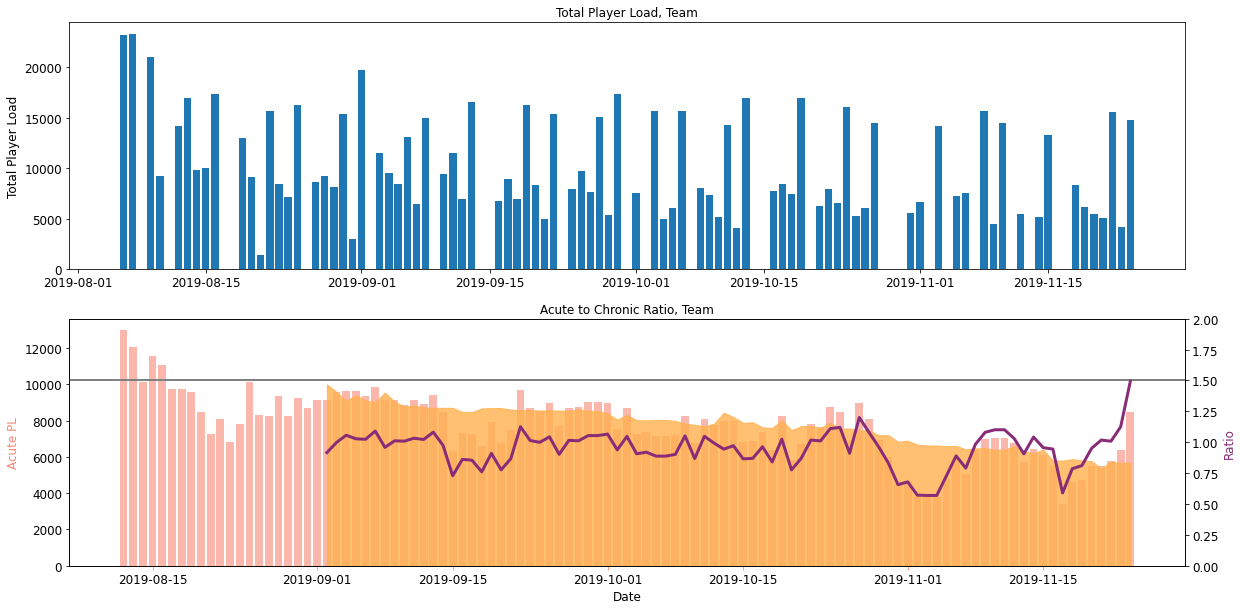

In [25]:
fig, axs = plt.subplots(2,figsize=(20, 10))

axs[0].bar(df_all.index, df_all["Total.Player.Load"])
#axs[0].set_xlabel("Date", fontsize=12)
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_ylabel('Total Player Load', fontsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].set_title("Total Player Load, Team", fontsize=12)

color='#FA8775'
axs[1].set_xlabel("Date", fontsize=12)
axs[1].tick_params(axis='x', labelsize=12, color=color)
axs[1].set_ylabel('Acute PL', color=color, fontsize=12)
axs[1].bar(df_all.index, df_all["Acute_PL"], color=color, alpha=0.6)
axs[1].tick_params(axis='y', labelsize=12)

color='#FFB14E'
axs[1].fill_between(df_all.index, df_all["Chronic_PL"], color=color, alpha=0.8)
axs[1] = plt.gca()
axs[1].set_title("Acute to Chronic Ratio, Team", fontsize=12)
axs1 = axs[1].twinx()  # instantiate a second axes that shares the same x-axis

color='#882C78'
axs1.set_ylabel('Ratio', fontsize=12, color=color)  # we already handled the x-label with ax1
axs1.plot(df_all.index, df_all["Acute:Chronic"], color=color, linewidth=3.0)
axs1.tick_params(axis='y', labelsize=12)
axs1 = plt.gca()

# To see how the acute to chronic workload ratio drops over the first 28 days, 
# comment out this line by adding a '#' in front of the line
axs1.set_ylim([0,2.0])

axs1.axhline(y=1.5,c="gray",linewidth=2,zorder=0)

## 4. Data Analysis

There are additional functions that allow us to find specific values or metrics more easily. We will be focusing on finding the minimum and maximum player load and acute to chronic workload ratio.

#### 4.1 Finding minimum and maximums

You can use .min() and .max() to find the highest and lowest values of a specific column. 

`df_all['Acute:Chronic'].max()`

You can also use nlargest() and nsmallest() to find the rows containing the highest 'n' or lowest 'n' values of a column.

`df_all.nlargest(5, 'Total.Player.Load')`

`df_all.nlargest(1, 'Total.Player.Load')`


In [26]:
df_all.nlargest(5, 'Total.Player.Load')

,Total.Player.Load,Session.Duration,Acute_PL,Chronic_PL,Acute:Chronic
Date,,,,,
2019-08-07,23271.41950,4549.577157,NaN,NaN,NaN
2019-08-06,23137.80677,3080.287415,NaN,NaN,NaN
2019-08-09,20985.59830,3626.730549,NaN,NaN,NaN
2019-09-01,19743.50586,2971.463101,9155.694257,NaN,NaN
2019-08-16,17305.52462,1934.711398,11046.745824,NaN,NaN


We see from this team ranking of the highest total playerload for a single day that it the two-a-day practices at the beginning of the season (Aug 6th, 7th, and 9th) were the highest values for the team across the entire season.  

Note: keep in mind that game days are very high exertion for those that are playing - but in this case we are summing values from across the entire team.  Related to this -- the 4th and 5th highest playerloads for the team did occur on game days (Sept 1st and Aug 16th, respectively) -- and there was nearly as high of a playerload despite a much shorter session duration on these games days.

In [27]:
df_all.nlargest(5, 'Acute:Chronic')

,Total.Player.Load,Session.Duration,Acute_PL,Chronic_PL,Acute:Chronic
Date,,,,,
2019-11-24,14747.77420,1736.455432,8487.232586,5679.085158,1.494472
2019-10-27,14501.17910,1824.957814,8960.459176,7463.725074,1.200534
2019-09-22,15381.46510,1984.078430,9655.861634,8575.321742,1.126006
2019-11-23,4165.01665,807.999986,6380.407700,5670.278190,1.125237
2019-10-25,5286.90142,907.866493,8446.504621,7539.558819,1.120292


We can see that the team values for the ACWR (using the 7 day acute and the 28 day chronic windows), never reached the value of 1.5.  However, we see that the value was 1.49+ on the last day of the season (November 24).